### Tesla Stock Price prediction using RNN 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader as pdr

In [2]:
df=pdr.get_data_yahoo('TSLA')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000
2017-09-12,24.584000,24.026667,24.299334,24.183332,89593500.0,24.183332
2017-09-13,24.538000,23.972668,24.254667,24.415333,62778000.0,24.415333
2017-09-14,25.197332,24.175333,24.288668,25.176001,108037500.0,25.176001


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-31,281.250000,271.809998,280.619995,275.609985,52107300.0,275.609985
2022-09-01,277.579987,266.149994,272.579987,277.160004,54287000.0,277.160004
2022-09-02,282.350006,269.079987,281.070007,270.209991,50752200.0,270.209991
2022-09-06,275.989990,265.739990,272.679993,274.420013,55860000.0,274.420013
2022-09-07,283.839996,272.269989,273.100006,283.700012,49889300.0,283.700012


In [4]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [5]:
#separate Open column from given dataset 
df1=df.iloc[:,1:2].values #or df1=df['Open']  df.loc[:,'Open']
#1:2 means start=1 and stop=2-1=1
type(df1)

numpy.ndarray

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
mms=MinMaxScaler()
df1=mms.fit_transform(df1)

In [8]:
df1

array([[0.02798066],
       [0.02928397],
       [0.0310443 ],
       ...,
       [0.65321655],
       [0.64473655],
       [0.66131573]])

In [9]:
#Find the total number of records 
df1.shape

(1258, 1)

In [10]:
#separate Input and output from Open column 
X_train=df1[0:1257] #start=0 steop=1258-1=1257 
Y_train=df1[1:1258] 

In [11]:
X_train.shape

(1257, 1)

In [12]:
Y_train.shape

(1257, 1)

In [13]:
X_train.ndim

2

In [14]:
X_train=np.reshape(X_train,(1257,1,1))

In [15]:
#To check dimension
X_train.ndim

3

In [16]:
X_train

array([[[0.02798066]],

       [[0.02928397]],

       [[0.0310443 ]],

       ...,

       [[0.64577751]],

       [[0.65321655]],

       [[0.64473655]]])

In [17]:
#Part-2 : -
#Building the RNN with LSTM 
#Recurrent neural network 
#LSTM means long short term memory 
from tensorflow.keras.models import Sequential #initialise neural network
from tensorflow.keras.layers import Dense,Dropout #to add input layer,output layer,
#and hidden layer
from tensorflow.keras.layers import LSTM  #to use built the model 
#LSTM : to manage internal memory , to store previous o/p 
#long short term memory 


In [18]:
#create objecgt of Sequential class
model=Sequential()

In [19]:
#To add layers in model
#This layer are input layer and LSTM layer 
model.add(LSTM(units=50,activation='sigmoid',input_shape=(None,1)))
#None means to take no. of rows and 1 means 1 column

#To add output layer 
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='linear'))

In [20]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
X_train1=X_train[:940]
X_test=X_train[940:]

In [22]:
len(X_train1),len(X_test)

(940, 317)

In [23]:
Y_train1=Y_train[:940]
Y_test=Y_train[940:]

In [24]:
len(Y_train1),len(Y_test)

(940, 317)

In [25]:
# Create Early stopping means create a call back
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [26]:
#Train the model
trained_model=model.fit(X_train1,Y_train1,validation_data=(X_test,Y_test),epochs=250)#callbacks=callback,validation_split=0.3)# means 20% data of training data X_train)
#80% for training and 20% for validation

Epoch 1/250
30/30 [==============================] - 1s 8ms/step - loss: 0.1630 - val_loss: 0.3828
Epoch 2/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0497 - val_loss: 0.2367
Epoch 3/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.2422
Epoch 4/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0455 - val_loss: 0.2276
Epoch 5/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0460 - val_loss: 0.2111
Epoch 6/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.2028
Epoch 7/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0413 - val_loss: 0.1895
Epoch 8/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0360 - val_loss: 0.1734
Epoch 9/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0350 - val_loss: 0.1695
Epoch 10/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0338 - val_loss: 0.1479
Epoch 11/

30/30 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 84/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 85/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 86/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 87/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 88/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0035
Epoch 89/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 0.0056
Epoch 90/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 91/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0065
Epoch 92/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 93/250


30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 246/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 247/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 248/250
30/30 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 249/250
30/30 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 250/250
30/30 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.0020


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


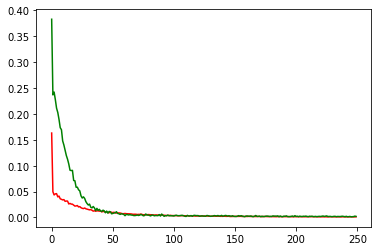

In [28]:
plt.plot(trained_model.history['loss'],color='red',label='training loss')
plt.plot(trained_model.history['val_loss'],color='green',label='validation loss')
plt.show()


In [29]:
Y_pred=model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [30]:
Y_pred

array([[0.45223543],
       [0.45700344],
       [0.46756253],
       [0.46933976],
       [0.47173214],
       [0.4725817 ],
       [0.47895047],
       [0.46984017],
       [0.4658924 ],
       [0.47243178],
       [0.48112413],
       [0.47870144],
       [0.4841897 ],
       [0.49618673],
       [0.5267824 ],
       [0.5276606 ],
       [0.5289649 ],
       [0.53343946],
       [0.5352426 ],
       [0.53095895],
       [0.5313285 ],
       [0.51365715],
       [0.50298154],
       [0.48829123],
       [0.5081897 ],
       [0.522383  ],
       [0.5257262 ],
       [0.51482797],
       [0.5026212 ],
       [0.5061559 ],
       [0.48897666],
       [0.50476587],
       [0.512754  ],
       [0.5081163 ],
       [0.502146  ],
       [0.51016384],
       [0.49388272],
       [0.50386566],
       [0.51154095],
       [0.5279022 ],
       [0.5513655 ],
       [0.55342704],
       [0.5596607 ],
       [0.5616056 ],
       [0.55075663],
       [0.556674  ],
       [0.55411357],
       [0.555

In [31]:
Y_test

array([[0.46333877],
       [0.47401918],
       [0.47582184],
       [0.47825074],
       [0.47911397],
       [0.48559668],
       [0.47632962],
       [0.47232655],
       [0.47896164],
       [0.48781402],
       [0.48534281],
       [0.49094537],
       [0.50325069],
       [0.5350465 ],
       [0.53596896],
       [0.53734001],
       [0.54205392],
       [0.54395812],
       [0.53943883],
       [0.53982814],
       [0.52132783],
       [0.51025811],
       [0.49514307],
       [0.51564911],
       [0.53043412],
       [0.53393785],
       [0.52254651],
       [0.50988574],
       [0.5135418 ],
       [0.49584548],
       [0.51210307],
       [0.52038844],
       [0.51557294],
       [0.50939489],
       [0.51769719],
       [0.50088103],
       [0.51117213],
       [0.51912743],
       [0.53622287],
       [0.56110435],
       [0.56331321],
       [0.57001597],
       [0.57211484],
       [0.56045269],
       [0.56680001],
       [0.56404952],
       [0.56602139],
       [0.561

In [32]:
#To remove scaling on Y_pred  , use inverse_transform which are define
#in MinMAxScaler class
Y_test1=mms.inverse_transform(Y_test)
Y_test1

array([[194.29333496],
       [198.5       ],
       [199.21000671],
       [200.16667175],
       [200.50666809],
       [203.05999756],
       [199.41000366],
       [197.83332825],
       [200.44667053],
       [203.93333435],
       [202.96000671],
       [205.16667175],
       [210.01333618],
       [222.53666687],
       [222.8999939 ],
       [223.44000244],
       [225.29666138],
       [226.04666138],
       [224.2666626 ],
       [224.41999817],
       [217.1333313 ],
       [212.77333069],
       [206.82000732],
       [214.89666748],
       [220.72000122],
       [222.1000061 ],
       [217.61332703],
       [212.62666321],
       [214.06666565],
       [207.09666443],
       [213.5       ],
       [216.76333618],
       [214.8666687 ],
       [212.43333435],
       [215.70333862],
       [209.08000183],
       [213.1333313 ],
       [216.2666626 ],
       [223.        ],
       [232.80000305],
       [233.66999817],
       [236.30999756],
       [237.13667297],
       [232

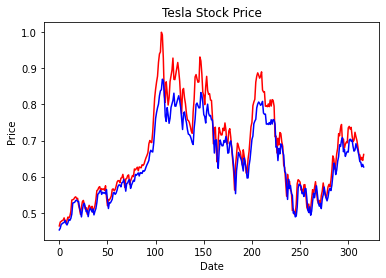

In [33]:
plt.plot(Y_test,color='red',label='Actual Stock Price')
plt.plot(Y_pred,color='blue',label='Predicted Stock Price')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [34]:
#Predict next day stock price 
n=float(input("Enter Today Opening Stock price : "))
#here n is a scaler variable
#print(type(n))
#First, converts n into 2D numpy array 
n=np.array(n).reshape(-1,1) #here -1 means None means automatic accept no.
#of rows but next 1 means no. of columns 
#print(type(n))
#print(n.ndim)
#Apply scaling : mormalisation means MinMaxScaler 
n1=mms.transform(n)
#print(n1)
#converts n1 from 2D into 3D array 
v=n1.reshape(-1,1,1)
#print(v)
#prediction 
pred=model.predict(v)
#print(pred)
#to remove scaling from pred
final=mms.inverse_transform(pred)
print("Opening Price of Next day : ",final)

Enter Today Opening Stock price : 273.10
1/1 [==============================] - 0s 77ms/step
Opening Price of Next day :  [[264.9167]]
